<a href="https://colab.research.google.com/github/RobertoFernandez1/EIE_401_MULTIMEDIA/blob/main/Actividad_2_FernandezRoberto_RobertoFernandez1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por:Roberto Ignacio Fernandez Fuentes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

In [53]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git #Abro la carpeta donde estan los archivos con igit


Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 276 (delta 26), reused 40 (delta 11), pack-reused 219
Receiving objects: 100% (276/276), 9.18 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/AbsorbanceTE_0-0.csv") #Funcion que abre el archivo.csv
df   #muestra el contenido del archivo

In [56]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(df["Freq [GHz]"],df["AbsorbanceTE []"])#con los datos del archivo se grafica
plt.xlabel("Freq [GHz]")
plt.ylabel("AbsorbanceTE []")


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


Text(0, 0.5, 'Amplitud')

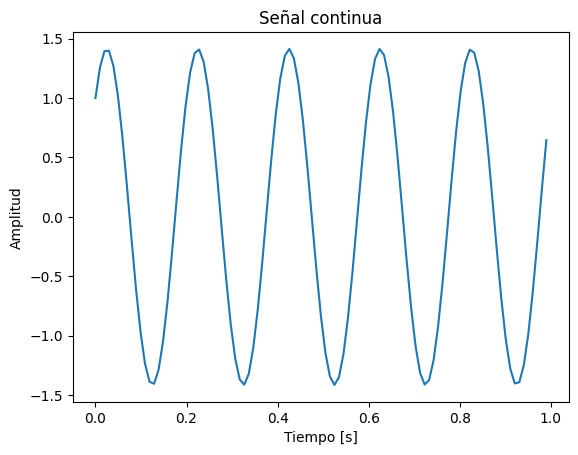

In [38]:
import numpy as np
import matplotlib.pyplot as plt
#establezco las variables con las que voy a trabajar
amplitud=1.0
fre=5.0
frec_muestreo=100
duracion=1.0
tiempo_continuo1=np.linspace(0,duracion,int(duracion+frec_muestreo),endpoint=False)
senal1=amplitud*np.sin(2*np.pi*fre*tiempo_continuo1)#Señal senoidal
senal2=amplitud*np.cos(2*np.pi*fre*tiempo_continuo1)#Señal cosenoidal
senal=senal1+senal2#suma ambas señales
plt.plot(tiempo_continuo1,senal)
plt.title("Señal continua")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')



## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

In [40]:
from scipy import signal #llamo a la libreria scipy para poder trabajar la señal impulso directamente
import numpy as np


In [62]:
impulso=signal.unit_impulse(10)#establezco un arreglo vectorial de 10 elementos
print(impulso)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Amplitud')

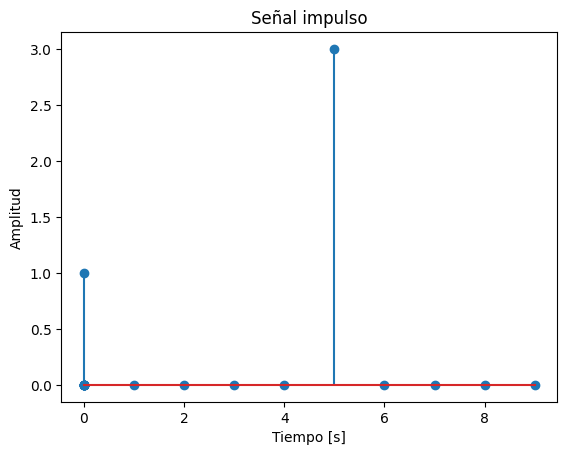

In [42]:
in1=signal.unit_impulse(10,2)#Posiciono ambos impulsos en distintos puntos para aso poder desplazarlos
in2=3*signal.unit_impulse(10,5)


plt.stem(np.zeros(len(in1)),in1)
plt.stem(in2)#Se usa la funcion stem para que el escalon se grafique de mejor manera
plt.title('Señal impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

In [33]:
import numpy as np
amplitud=1.0
fre=5.0
frec_muestreo=100
duracion=1.0
tiempo_continuo=np.linspace(0,duracion,int(duracion+frec_muestreo),endpoint=False) #Señal continua sin muestreo
senal=amplitud*np.sin(2*np.pi*fre*tiempo_continuo)

In [ ]:
tiempo_muestreo=np.arange(0,duracion,1.0/frec_muestreo) #Señal continua con muestreo
senal_muestreada=amplitud*np.sin(2*np.pi*fre*tiempo_muestreo)

Text(0, 0.5, 'Amplitud')

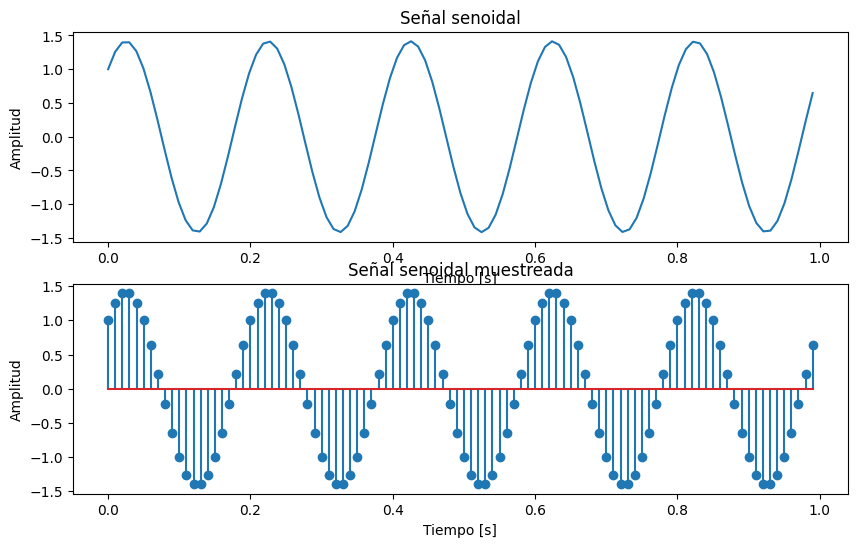

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(tiempo_continuo,senal)
plt.title('Señal senoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.subplot(2,1,2)
plt.stem(tiempo_muestreo,senal_muestreada)
plt.title('Señal senoidal muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

### 3.3 Genere una señal Triangular y realice la operación de sampleo

Text(0, 0.5, 'Amplitud')

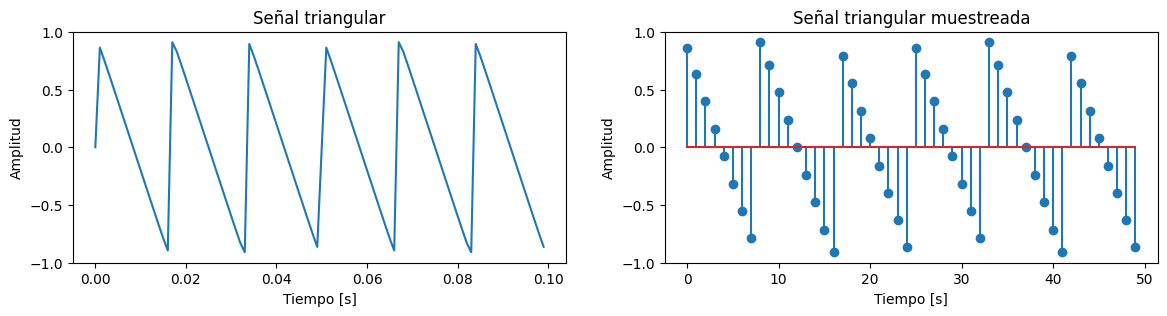

In [49]:
#Establecemos nuestras variables
f=60
d=0.001
j=100

t=np.arange(0,j*d,d)
x=np.zeros(j)

#Descomponemos en la señal triangular en series de fourier con la ayuda de un siglo for
for j in range(1,100):
  x += (2/np.pi)*(1/j)*np.sin(2*np.pi*j*f*t)
tiempo_muestreo=2
contador=0
muestras=[]#creo una lista

for i in range(len(x)):
  contador=contador+1
  if contador == tiempo_muestreo:
    muestras.append(x[i])
    tiempo_muestreo=tiempo_muestreo+2#esteblezco los saltos para el muestreo

plt.figure(figsize=(14,3))

plt.subplot(1,2,1)
plt.plot(t,x)
plt.title('Señal triangular')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(1,2,2)
plt.stem(muestras)
plt.title('Señal triangular muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

In [34]:
import numpy as np
amplitud=1.0
fre=5.0
frec_muestreo=100
duracion=1.0
tiempo_continuo1=np.linspace(0,duracion,int(duracion+frec_muestreo),endpoint=False)
senal1=amplitud*np.sin(2*np.pi*fre*tiempo_continuo1)
senal2=amplitud*np.cos(2*np.pi*fre*tiempo_continuo1)
senal=senal1+senal2

In [51]:
tiempo_muestreo=np.arange(0,duracion,1.0/frec_muestreo)
senal1_muestreada=amplitud*np.sin(2*np.pi*fre*tiempo_muestreo)
senal2_muestreada=amplitud*np.cos(2*np.pi*fre*tiempo_muestreo)
senal_muestreada=senal1_muestreada+senal2_muestreada


Text(0, 0.5, 'Amplitud')

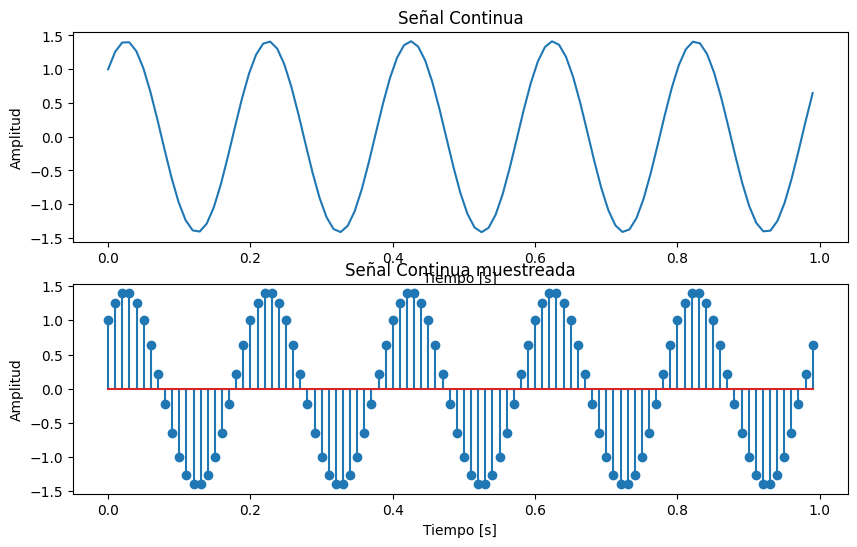

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(tiempo_continuo1,senal)
plt.title('Señal Continua')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.stem(tiempo_muestreo,senal_muestreada)
plt.title('Señal Continua muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

### 3.6 Explica tus hallazgos

Para la parte 1 fue muy importante lo que aprendi en la clase de catedra del curso con el comando igit con el cual pude abrir los archivos que habia que graficar,la parte 2 fue un repaso de concimientos que ya habia adquirido en la primera actividad ,en la parte 3.1 busque por cuenta propia atravez de internet y distintas fuentes como poder grafciar un impulso ,la libreria de python from scipy import signal me facilito mi trabajo para posteriormente poder graficar ,en la parte 3.2 con el material que vi en catedra pude identificar como poder hacer el sampleo a una funcion sinusoidal de manera mas simple con plt.stem ,el cual tambien lo ocupe en las posteriores partes de la actividad.en la parte 3.3 tuve que investigar como era el metodo para grafciar un señal triangular ,en mi investigacion me acorde de la descomposicion en series de fourier el cual simplifico mi trabajo para poder graficat y hacer el sampleo ,ya para la parte 3.4 se me hizo mas sencilla ya que pude aplicar loq ue ya habia aprendido en el punto 3.2 de la tarea.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py